# COGS 108 - Final Project 

# Overview

 In order to help improve the health inspection process of the restaurants in North Carolina, we need to explore some useful information in inspection process. When we have the violation records of these restaurants, what can we learn from these ? It is inefficient to do very detailed health inspection on every restaurants and every aspects. Perhaps, It will be better if we can focus on some restaurants or some aspects to do detailed inspection.

# Name & PID

- Name: Yong Liu 
- PID: A15126460

# Research Question

Among all the restaurants with violations during insepction, what kind of violation category are more likely to have repeated violation ?  or what other factors that may make an restaurant have repeated violations? Is it relates to the open date of an restaurant ? 

## Background and Prior Work

 1. Violation type explantion: 
 Form the inspection manage system , during the health inspection process, the inspector record the different violation types that are: NA=Not Applicable	 	NO=Not Observed	 	CDI=Corrected During Inspection	 	R=Repeat Violation	 	VR=Verification Required	
  
  
  2. The inspecting frequency: 
  In the state of North Carolina, foodservice establishments such as restaurants, take-out or delivery food businesses, school cafeterias and institutions (hospital, nursing home, etc.) are to be inspected at a frequency that is determined by the complexity of the menu and the susceptibility of the population served. There are four risk categories with a corresponding inspection frequency.Risk Category I establishments are inspected once per year, do not serve potentially hazardous foods and are most often bars or coffee shops that use reusable cups or drinking glasses.
Risk Category II establishments are inspected twice per year, have limited menus with simple food preparation procedures and are primarily cook and serve type establishments.
Risk Category III establishments are inspected three times per year, have a more complex menu and cook some foods in advance, then refrigerate the foods to be reheated and served at a later time.
Risk Category IV establishments are inspected four times per year, have the most complex menus that involve cooking, cooling and reheating of several foods or they serve a highly susceptible population such as children, elderly persons or those who may
be immunocompromised.
  3. the predcition of NYC restaurant health inspection has some thing I can learn from. For example, they made assumpotions that the food type, the stree, the name, zipcode and borough might be useful features to use, which inspire me to think about maybe the years of opened is also related. 
  
References  links:
- 1) the violation type explantion from inpection management system 
https://public.cdpehs.com/NCENVPBL/INSPECTION_VIOLATION/ShowVIOLATIONTable.aspx?INSPECTION=3421828&ESTABLISHMENT=177780&esttst_cty=60
- 2) Prediction of NYC Restaurant Health Inspection Results
http://cs229.stanford.edu/proj2013/Walter-PredictionOfNYCRestaurantHealthInspectionResults%20pdf.pdf

# Hypothesis


Hypothesis 1: The repeated violation may exist more in profit related catagory, for example the restaurant  tends to use cheaper food matertial or untencils  which might result in repeated violations

Hypothesis 2 : The older restraunt might have more repeated violations because they were experienced about the inspection process and they may loose the requirments on facilities they used when they have stable customers in order to decease the cost. 

# Dataset(s)


- Dataset Name: violation.csv
- Link to the dataset: individual_sp20/data/violation.csv
- Number of observations: 5(X.objectid, category, critical,violationtype)

This dataset constains the list of restaurants with violations during health inspection process. It also contasins a column that indicates whether this violation is been corrected or repeated.  

- Dataset Name: restaurants.csv
- Link to the dataset: 
- Number of observations:4(X.objectid, name, facilitytype, restaurantopendate)

This dataset provides the basic information of each restaurants. 

To anser all of the questions, I might need to combine this two dataset together to explore some useful information. The key to join these two datasets together is the shareed id-X.objectid. 

# Setup

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from sklearn import linear_model
from datetime import date

In [2]:
df1 = pd.read_csv("data/violations.csv")
df2 = pd.read_csv('data/restaurants.csv')

# Data Cleaning

First, lets drop the unusegul columns 

In [3]:
df1 = df1[['X.objectid', 'category', 'critical',  'violationtype']]
df2 = df2[['X.objectid', 'name', 'facilitytype', 'restaurantopendate']]
print(df1.shape)
print(df2.shape)

(189802, 4)
(3324, 4)


In [4]:
df1.head()


,X.objectid,category,critical,violationtype
0,2149,Chemical,Yes,R
1,2150,Chemical,Yes,CDI
2,2151,Chemical,Yes,CDI
3,2152,Chemical,Yes,CDI
4,2153,Chemical,Yes,CDI


In [5]:
df2.head()

,X.objectid,name,facilitytype,restaurantopendate
0,1001,SPRING CAFE 2,Restaurant,2016-05-26T00:00:00.000Z
1,1002,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),Pushcarts,2016-07-01T00:00:00.000Z
2,1003,Taco Bell #22798,Restaurant,2005-12-05T00:00:00.000Z
3,1004,THE REMEDY DINER,Restaurant,2009-02-04T00:00:00.000Z
4,1005,ZEBULON HOUSE (KITCHEN),Institutional Food Service,2009-02-18T00:00:00.000Z


### First, check the missingness of the data and clean it. 

In [6]:
df1.isna().sum()

X.objectid           0
category             0
critical          8957
violationtype    94639
dtype: int64

Drop the missningness data, critical and violationtype is misssing may because that some cases are hard to determine the ctritical and violationtype. 

In [7]:
df1 = df1.dropna()
df1.shape

(89473, 4)

In [8]:
df2.isna().sum()

X.objectid            0
name                  0
facilitytype          0
restaurantopendate    0
dtype: int64

the df2 which is the restrarunts dataset has no missing data here;

### check that if there some weird value in some columns by check the unique value 

In [9]:
df1['category'].value_counts()

Potentially Hazardous Food Time/Temperature    16699
Protection from Contamination                  14331
Utensils and Equipment                          9255
Physical Facilities                             8471
Preventing Contamination by Hands               7915
Chemical                                        5050
Employee Health                                 5040
Prevention of Food Contamination                4928
Food Temperature Control                        4917
Proper Use of Utensils                          4034
Supervision                                     2922
Consumer Advisory                               1843
Good Hygienic Practices                         1321
Food Identification                             1083
Approved Source                                  989
Safe Food and Water                              395
Conformance with Approved Procedures             266
Highly Susceptible Populations                    14
Name: category, dtype: int64

In [10]:
df1['critical'].value_counts()

Yes    62240
No     27233
Name: critical, dtype: int64

In [11]:
df1['violationtype'].value_counts()

CDI    59230
R      25570
VR      4673
Name: violationtype, dtype: int64

In [12]:
df2['facilitytype'].value_counts()

Restaurant                           2229
Food Stand                            603
Public School Lunchrooms              171
Meat Market                            99
Mobile Food Units                      76
Pushcarts                              55
Institutional Food Service             46
Limited Food Service                   22
Private School Lunchrooms              15
Elderly Nutrition Sites (catered)       8
Name: facilitytype, dtype: int64

We only inspect these three columns bacause they are all categorical data and it is easy to have some weird value which may affect our analysis.The result has showed that our data are all good. 

### since we need to analyze the realtionship between the open date and the violation type , it is better to convert the open data to how long the restaurant has opened. 


In [13]:
def convert_toYears(x):
    return date.today().year-int(x[0:4])

In [14]:
df2['restaurantopendate'] = df2['restaurantopendate'].apply(convert_toYears)
df2 = df2.rename(columns = {'restaurantopendate':"openyears"})

### I will also need join these two data frame together by the shared X.objectid

In [15]:
combine = df2.merge(df1, on = 'X.objectid')
combine.shape

(2832, 7)

In [16]:
combine.head()

,X.objectid,name,facilitytype,openyears,category,critical,violationtype
0,1001,SPRING CAFE 2,Restaurant,4,Approved Source,Yes,VR
1,1002,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),Pushcarts,4,Approved Source,Yes,CDI
2,1003,Taco Bell #22798,Restaurant,15,Approved Source,Yes,R
3,1004,THE REMEDY DINER,Restaurant,11,Approved Source,Yes,CDI
4,1005,ZEBULON HOUSE (KITCHEN),Institutional Food Service,11,Approved Source,Yes,CDI


# Data Analysis & Results

### To answer the questions , we need to take a look at the some stats about violation dataset 

In [17]:
df1[df1['critical'] =='Yes']['violationtype'].value_counts()

CDI    50239
R       7422
VR      4579
Name: violationtype, dtype: int64

In [18]:
result = df1[df1['critical'] =='Yes']['violationtype'].value_counts()
print('The total number of violations which is critical: ', result.sum())
print('The percent of repeated violations which is critical: ', result[1]/result.sum())


The total number of violations which is critical:  62240
The percent of repeated violations which is critical:  0.11924807197943445


In [19]:
df1[df1['critical'] =='No']['violationtype'].value_counts()

R      18148
CDI     8991
VR        94
Name: violationtype, dtype: int64

In [20]:
result2 = df1[df1['critical'] =='No']['violationtype'].value_counts()
print('The total number of violations which is not critical: ', result2.sum())
print('The percent of repeated violations which is not critical: ', result2[1]/result2.sum())


The total number of violations which is not critical:  27233
The percent of repeated violations which is not critical:  0.33015091983990014


### Through this stats, our hypothesis that non-critical violation tends to be more likely happend repeatedly is correct. 
### How does it related to the violation category? Which violation category is more likely to have repeated violation ? let's plot a graph to visualize it. 

In [21]:
table1 = pd.pivot_table(df1, values=['X.objectid'], index=['category', 'violationtype'], aggfunc = 'count')
table1.head(10)

X.objectid
category                             violationtype            
Approved Source                      CDI                   755
                                     R                     106
                                     VR                    128
Chemical                             CDI                  4523
                                     R                     437
                                     VR                     90
Conformance with Approved Procedures CDI                   202
                                     R                      39
                                     VR                     25
Consumer Advisory                    CDI                  1097

### There are 18 category , it will look really messy if we plot them all, therefore I only plot the top10 violation category here. 

In [22]:
#top10 violation 
top10 = list(df1['category'].value_counts()[0:10].index)
# analyze violations only in these 10 catagory
top_10 = df1[df1['category'].apply(lambda x : True if x in top10 else False )]

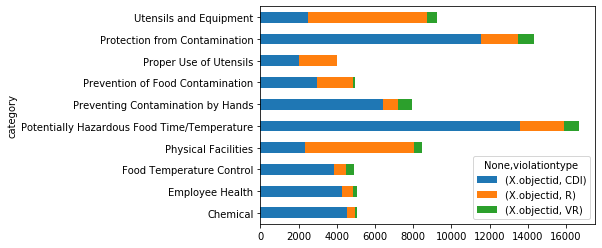

In [23]:
table1 = pd.pivot_table(top_10, values = ['X.objectid'], index=['category'],columns = ['violationtype'], aggfunc = 'count')
table1.plot(kind = 'barh', stacked = True)


#### Form the bar plot , we can notice that "Utensils and Equipment" , "Phisical Facilities" are the two categories that are most likely to have repeated violations. "Potentially Hazardous Food Time/Temperature" and "Protection from Contamination" are the two categories that have the most violations. What is more, "Utensils and Equipment" , "Phisical Facilities", "Proper use of utensils'and "Prevention of Food Contamination" have realtively larger percentage of repaeated violations among all of their violations respectively. These are useful informations for us to learn because government can be more strict when they inspect these categoties next time. In conclusion, my first hypothesis is very close to this result. 

### Now ,in order to test my hyothesis that there is an signigicant difference of openyears between restaurant with R violationtype and CDI violationtype, we need to use the combined table I made before 

In [24]:
combine.head()

,X.objectid,name,facilitytype,openyears,category,critical,violationtype
0,1001,SPRING CAFE 2,Restaurant,4,Approved Source,Yes,VR
1,1002,CAROLINA CLASSIC HOT DOGS #2 (WCID #549),Pushcarts,4,Approved Source,Yes,CDI
2,1003,Taco Bell #22798,Restaurant,15,Approved Source,Yes,R
3,1004,THE REMEDY DINER,Restaurant,11,Approved Source,Yes,CDI
4,1005,ZEBULON HOUSE (KITCHEN),Institutional Food Service,11,Approved Source,Yes,CDI


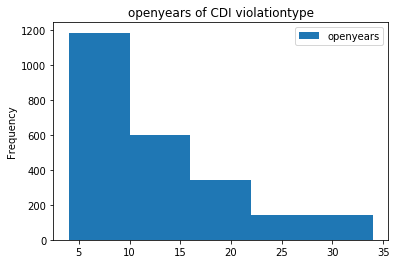

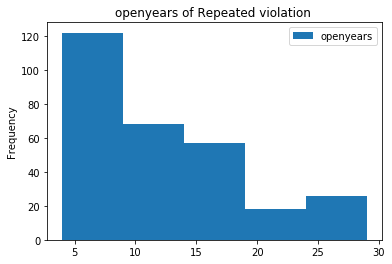

In [25]:
# plot the histgram for openyears 
combine[combine['violationtype'] == 'CDI'][['openyears']].plot(kind = 'hist', bins = 5, title = "openyears of CDI violationtype")
# plot the histgram for openyears when violationtype is R
combine[combine['violationtype'] == 'R'][['openyears']].plot(kind = 'hist', bins = 5, title = "openyears of Repeated violation ")

#### The two histrogram distributions show that distribution of openyears when violation type is R is very similar with the distribution of openyears when violation type is CDI. It seems that my hypothesis is wrong , but we still need to dwaw a box plot to visualize the difference

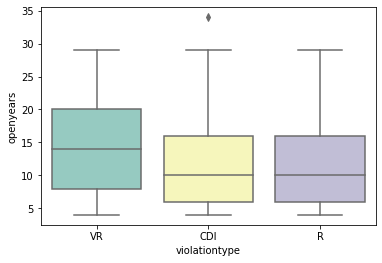

In [26]:

sns.boxplot(x='violationtype', y='openyears',data=combine, palette="Set3" )

### Through the boxplot we can see that the max, min, mean of  openyears of R type and CDI type  are all roughtly the same as each others. Now, we can conlude that my hypothesis that there is a siginigicant difference is wrong. 



# Ethics & Privacy

1. The questions: The questions that I want to aksed is possible to answer. The scope of the question focus on the violation records of North Corolia 
2. The Implications: The skateholders include the inspector and restaurants. The questions may have influences on inspectors work load since the project will suggest some specific aspects or restaurants to have detailed inspections or stronger penalty. My project will also influence the restaurants' profit and reputations. 
3. The Data: The data came from the health inpsection department. The violations was collectied by inspector and reconrded during inpection process. The restaurant data was recorded by when the restaurant ask for permission to do business from the local government. I don't think restaurant data have any biased because the information are all required to offer when it opened. There indid some possibble biased of the violations dataset. For example, there are some missing value in the violationtype columns. It is possible that the inspector did not report honesly about the problem, which may due to the personal relationship between inspector and restaurant owner. The possibilities of bribery should also be considered here. To handle this, the best way is to drop the missing data. 


# Conclusion & Discussion

       In conclusion, the questions are answered successfully by my project. What kind of violation category are tends to have repeated violations? "Utensils and Equipment" , "Physical Facilities" are the two categories that are most likely to have repeated violations. "Potentially Hazardous Food Time/Temperature" and "Protection from Contamination" are the two categories that have the most violations. What is more, "Utensils and Equipment" , "Physical Facilities", "Proper use of utensils'and "Prevention of Food Contamination" have relatively larger percentage of repeated violations among all of their violations respectively. These are useful information’s for inspectors to do a more effective inspection next time. Is repeated violations related to restaurant open years? The answer is No; 
   
       My analysis focus on the relationships between variables. In specific, drawing graphs based on pivot table and comparing the distribution and stats on the open years.  
   
       possible limitation is about the combined dataset. The repeated violation type is much fewer than CDI. There are enough violations data but when combine with restaurants, there are lots of objectID which did not match. The analysis will be more successful if we have more data on the combined dataset. The project may affect the work load of the inspector and reputations or profit of a restaurant. 
